# GRIP - The Sparks Foundation

# Data Science and Business Analytics Intern 

# Author : Dinesh Nath Goswami

## Task 2 : Prediction using Unsupervised ML

## Objective : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the Data

In [2]:
data = pd.read_csv('Iris.csv')

Check sample records from the dataset

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Check statistical details of data

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Drop ID column

In [5]:
data.drop("Id",axis='columns',inplace=True)

In [6]:
data.shape

(150, 5)

### Data Visualisation

Visualising using pairplots to find the distribution of data

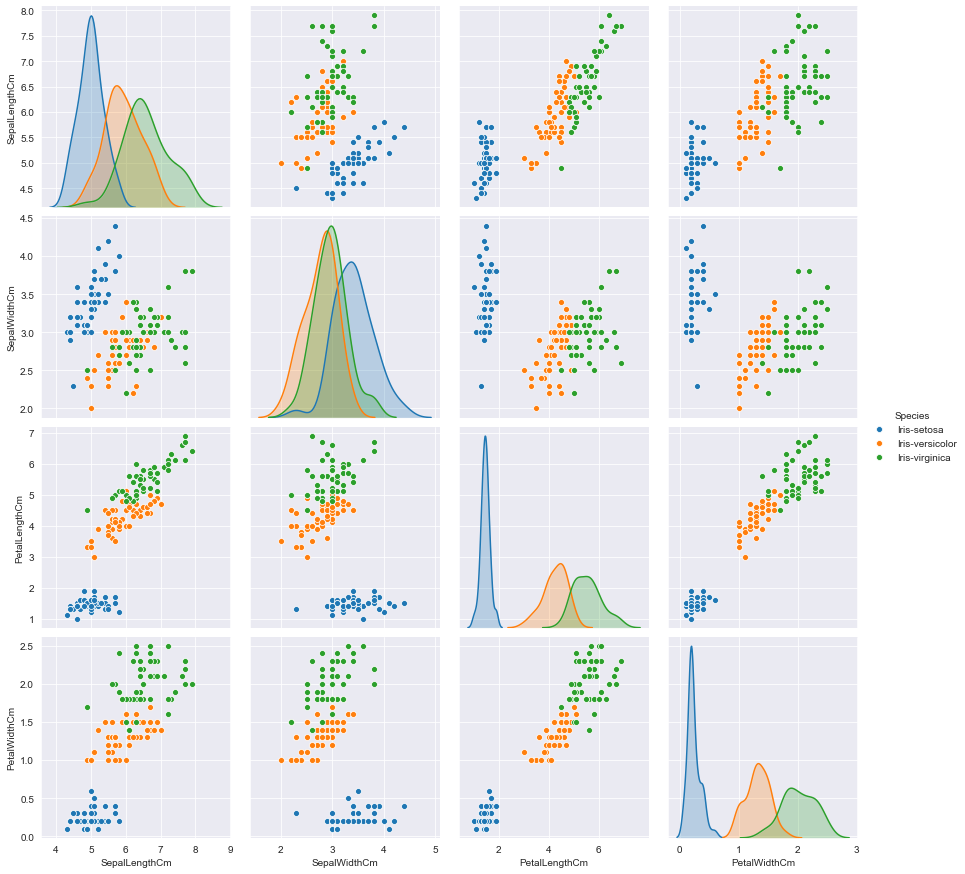

In [7]:
sns.set_style("darkgrid");
sns.pairplot(data, hue = "Species", height = 3)
plt.show()

In [9]:
data.shape

(150, 5)

### Correlation Matrix

In [10]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


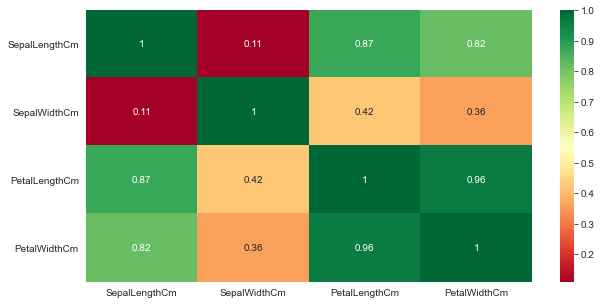

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()),cmap='RdYlGn',annot = True)
plt.show()

### Finding optimal number of clusters using Elbow Method

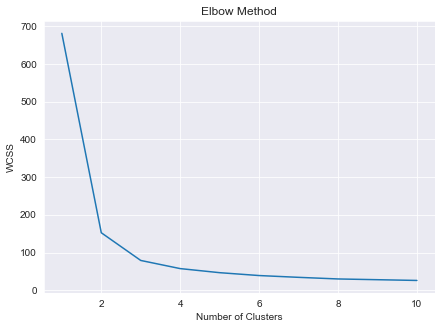

In [15]:
X = data.iloc[:,[0,1,2,3]].values


from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(7,5))
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimal number was found to be '3'

### Using the KMeans Classifier 

In [16]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

### Predicting the values

In [17]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Storing the Centroids of the clusters in a variable

In [18]:
centroids = kmeans.cluster_centers_

### Visualising the Clusters 

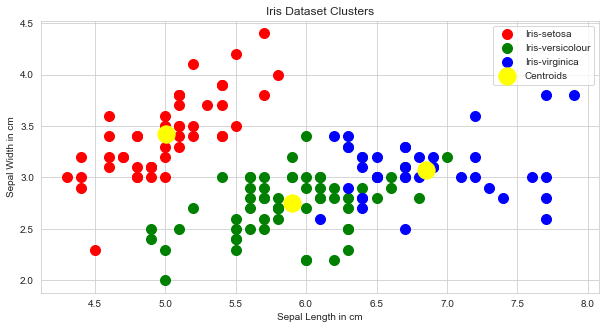

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s=100, c='red', label='Iris-setosa')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s=100, c='green', label='Iris-versicolour')
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s=100, c='blue', label='Iris-virginica')
plt.scatter(centroids[:,0], centroids[:,1], s=300, c='yellow', label='Centroids')
plt.title('Iris Dataset Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.legend()
plt.show()